# Climate Change 

<img src="Pictures/Обложка.png">



**Описание проекта**

    Данные взяты с сайта Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
    
    Проект призван людей разобраться в проблеме глобального потепления - а именно в существовании этой проблемы, ведь есть сторонники, которые утверждают, что глобальное потепление выдумка, завязанная на статистике - други утверждают, что явление глобального потепления реально. Изучение мировых температур поможет разобраться в этой проблеме, сформирует личное мнение на этот счет. А так же поможет в прогнозировании погоды, а именно температуры на следующие года.


<img src="Pictures/Разделитель.png">


**Описание данных** 

    Проект включает в себя данные по глобальной температуре Земли(как на суше, так и на водной поверхности). 
    Эти данные собраны с 1740-ых годов, под различными условиями, метриками и приборами, что создает некоторую сложность, и в тоже время интерес к ним. 
    В этот набор данных у нас есть несколько файлов:

    Глобальные температуры земли и океана и суши ( GlobalTemperas.csv ):

1. Date:    начинается в 1750 году для средней температуры земли и в 1850 году для максимальной и минимальной температуры земли и глобальной температуры океана и земли
2. LandAverageTempera:   средняя глобальная температура земли в градусах Цельсия
3. LandAverageTemperatureUncertainty:   95% доверительный интервал вокруг среднего
4. LandMaxTempera:   средняя глобальная максимальная температура земли в градусах Цельсия
5. LandMaxTemperatureUncertainty:   95% доверительный интервал вокруг максимальной температуры земли
6. LandMinTempera:   средняя глобальная минимальная температура земли в градусах Цельсия
7. LandMinTemperatureUncertainty:   95% доверительный интервал вокруг минимальной температуры земли
8. LandAndOceanAverageTemperature:   средняя глобальная температура суши и океана в градусах Цельсия
9. LandAndOceanAverageTemperatureUncertainty:   95% доверительный интервал вокруг средней глобальной температуры суши и океана

    *Другие файлы включают в себя данные по*:

1. Глобальная средняя температура земли по стране ( GlobalLandTemperasByCountry.csv )
2. Глобальная средняя температура земли по состоянию ( GlobalLandTemperasByState.csv )
3. Global Land температуры Major City ( GlobalLandTemperaturesByMajorCity.csv )
4. Глобальные температуры земли по городам ( GlobalLandTemperasByCity.csv )

*Необработанные данные поступают со страницы данных Земли Беркли*


<img src="Pictures/Разделитель.png">

# Tutorial

<img src="Pictures/Разделитель.png">

Для визуализации используется библиотека plotly.offline, позволяющая наглядно визуализировать данные

**Временные ряды**

Временные ряды, как правило, возникают в результате измерения некоторого показателя. Это могут быть как характеристики технических систем, так и показатели природных, социально-экономических явлений и процессов. Например, динамика курса валюты или курса акции, при анализе которых пытаются определить основное направление развития, т.е. тренд. Или, например, анализ динамики продаж компании с целью планирования остатков на складе.

Подходы к моделированию временного ряда можно разделить на два направления:

моделирование неслучайной составляющей в совокупности;
разложение временного ряда на составляющие компоненты и моделирование значений каждой компоненты в отдельности.

Прогнозирование тесно связано с планированием и используется для эффективного принятия решений. Прогнозирование может дать ответ на вопрос: что вероятнее всего ожидать в будущем относительно исследуемого процесса или что необходимо сделать, чтобы достичь заданного состояния исследуемого объекта прогнозирования.


**ПОНЯТИЕ СТАЦИОНАРНОСТИ ВРЕМЕННОГО РЯДА**
    Тренд (от англ. Trend — тенденция) — долговременная тенденция изменения исследуемого временного ряда Вр ряд - упорядоченн последовательность показателей, кот характеризуют развитие явления во времени.
    Стационарн в.р. – отражение некот случайн процесса, сам процесс – в равновесии относит некоего постоянн средн уровня, его хар-ки не завис от момента времени. Стационарн процесс свободен от периодич Стационарные ряды (в анализе временных рядов). 
    В анализе временных рядов стационарные ряды имеют постоянные по времени среднее, дисперсию и автокорреляции (т.е. сезонные зависимости удаляются с помощью разностей).

**Для анализа данных используется Тест Дики-Фуллера**
    Это методика, которая используется в прикладной статистике и эконометрике для анализа временных рядов для проверки на стационарность.
    
   <img src="Pictures/Дики-Фуллер.png">
    
   Для каждой из трёх тестовых регрессий существуют свои критические значения DF-статистики, которые берутся из специальной таблицы Дики — Фуллера (МакКиннона).
   
**SARIMA** Модифицированная модель ARIMA (Бокса — Дженкинса, методология Бокса — Дженкинса) — интегрированная модель авторегрессии — скользящего среднего — модель и методология анализа временных рядов
    **Формальное определение модели**
    
   <img src="Pictures/ARIMA.png">
   
   
   
   <img src="Pictures/SARIMA.png">
   
   
   **Скользящее срежнее**

Скользящее среднее относится к классу индикаторов, следующих за трендом, оно помогает определить начало новой тенденции и ее завершение, по его углу наклона можно определить силу (скорость движения), оно же в качестве основы (или сглаживающего фактора) применяется в большом количестве других технических индикаторов. Иногда скользящее среднее называют линией тренда.

   <img src="Pictures/СкользящееСреднее.png">
   
   **Значение графиков ACF и PACF в анализе временных рядов**
   
   ACFявляется (полной) функцией автокорреляции, которая дает нам значения автокорреляции любого ряда с его запаздывающими значениями. 
   
   PACFявляется частичной функцией автокорреляции. По сути, вместо того, чтобы находить корреляции настоящего с лагами, такими как ACF, он находит корреляцию остатков (которая сохраняется после устранения эффектов, которые уже были объяснены более ранним лагом (ами)) со следующим значением лага, следовательно, «частичным», а не «полным». «как мы удаляем уже найденные варианты, прежде чем мы найдем следующую корреляцию. Таким образом, если в остатке есть какая-то скрытая информация, которую можно смоделировать с помощью следующего лага, мы можем получить хорошую корреляцию и сохраним это следующее лагу в качестве функции при моделировании. 
   
   Авторегрессивный (AR) процессвременной ряд называется AR, когда текущее значение временного ряда может быть получено с использованием предыдущих значений того же временного ряда
   
   <img src="Pictures/AR.png">
   



<img src="Pictures/Разделитель.png">

## Ссылки



Задача Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

Репозиторий - https://github.com/SizovaDarya708/ClimateChange

Анализ и прогнозирование временных рядов - https://www.statmethods.ru/statistics-metody/modeli-vremennykh-ryadov/

О стационарности временного ряда - https://metr-ekon.ru/index.php?request=full&id=103 
    
Критерий и тест Дики-Фуллера - https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%94%D0%B8%D0%BA%D0%B8_%E2%80%94_%D0%A4%D1%83%D0%BB%D0%BB%D0%B5%D1%80%D0%B0

Модель - ARIMA, SARIMA - https://www.youtube.com/watch?v=pQm7ZDgB1tA, http://www.machinelearning.ru/wiki/index.php?title=ARIMA

О том, как прогнозируется погода - https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B

Значение графиков ACF и PACF в анализе временных рядов - https://www.machinelearningmastery.ru/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8/
 
Скользящее среднее - http://enc.fxeuroclub.com/105/

Сравнение моделей - https://www.machinelearningmastery.ru/compare-machine-learning-algorithms-python-scikit-learn/

<img src="Pictures/Разделитель.png">

**Выгрузка библиотек**

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time
import warnings
warnings.filterwarnings('ignore')

**Выгрузка данных**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


import warnings
warnings.simplefilter('ignore')

%matplotlib inline

global_temp = pd.read_csv("GlobalTemperatures.csv");
global_temp_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv");


In [4]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


**Визуализация температуры по странам**

In [5]:
#Удаление пропущенных значений по странам
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [10]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

In [11]:
layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

*В гит не отображается верхняя визуализация температур на Земном шаре => *
<img src="Pictures/Глобус.png">

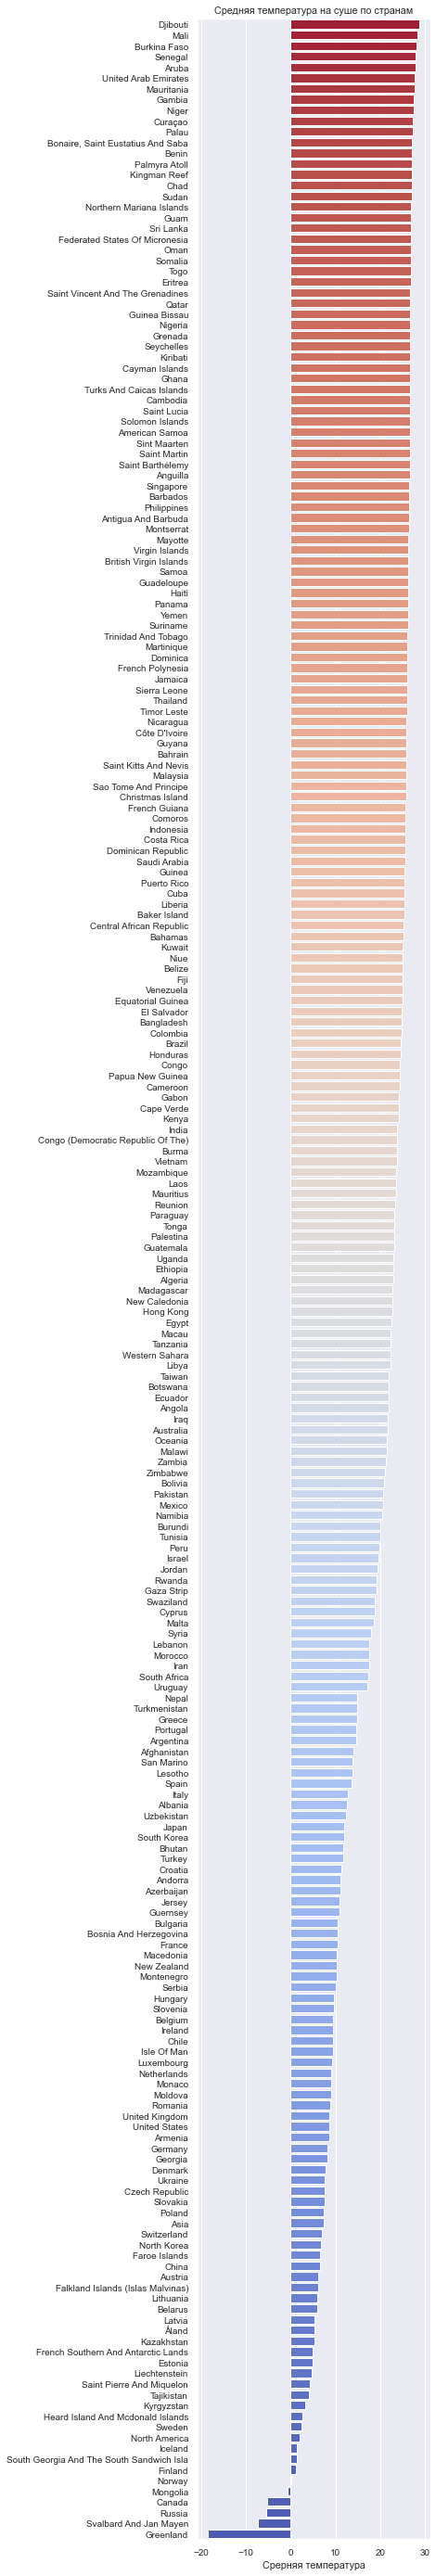

In [34]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Срерняя температура', title='Средняя температура на суше по странам')

In [13]:
glob_coun = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
glob_coun.dt = pd.to_datetime(glob_coun.dt).dt.strftime('%d/%m/%Y')
glob_coun['dt']=glob_coun['dt'].apply(lambda x:x[6:])
glob_coun=glob_coun.groupby(['dt', 'Country'])['AverageTemperature'].mean().reset_index()

Количество стран в выборке

In [14]:
len(glob_coun.groupby('Country').count())

243

In [15]:
glob_coun = glob_coun[~glob_coun['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

glob_coun = glob_coun.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [16]:
countries2013 = np.unique(glob_coun.Country[glob_coun['dt']== '2013'])
countries1920 = np.unique(glob_coun.Country[glob_coun['dt']== '1920'])

## 1900

In [17]:
data = [ dict(
        type = 'choropleth',
        locations = countries1920,
        z = glob_coun.AverageTemperature[glob_coun['dt']== '1920'],
        locationmode = 'country names',
        text = countries1920,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average<br>Temperature,<br>°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in 1920',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'white',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

## 2013

In [18]:
data = [ dict(
        type = 'choropleth',
        locations = countries2013,
        z = glob_coun.AverageTemperature[glob_coun['dt']== '2013'],
        locationmode = 'country names',
        text = countries2013,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average<br>Temperature,<br>°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in 2013',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'white',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

Основываясь на цвете глобусов, немного трудно увидеть какие-либо радикальные изменения, произошедшие за более чем 100 лет.

Однако, если присмотреться к крупным странам, таким как США, Россия, Китай, Германия и т. Д., То заметно, что температура повышалась на 2-3 градуса в течение 100 лет.

In [19]:
temperature_1920, countries_1920 = (list(x) for x in zip(*sorted(zip(glob_coun.AverageTemperature[glob_coun['dt']== '1920'], countries1920), 
                                                             reverse = True)))
temperature_2013, countries_2013 = (list(x) for x in zip(*sorted(zip(glob_coun.AverageTemperature[glob_coun['dt']== '2013'], countries2013), 
                                                             reverse = True)))

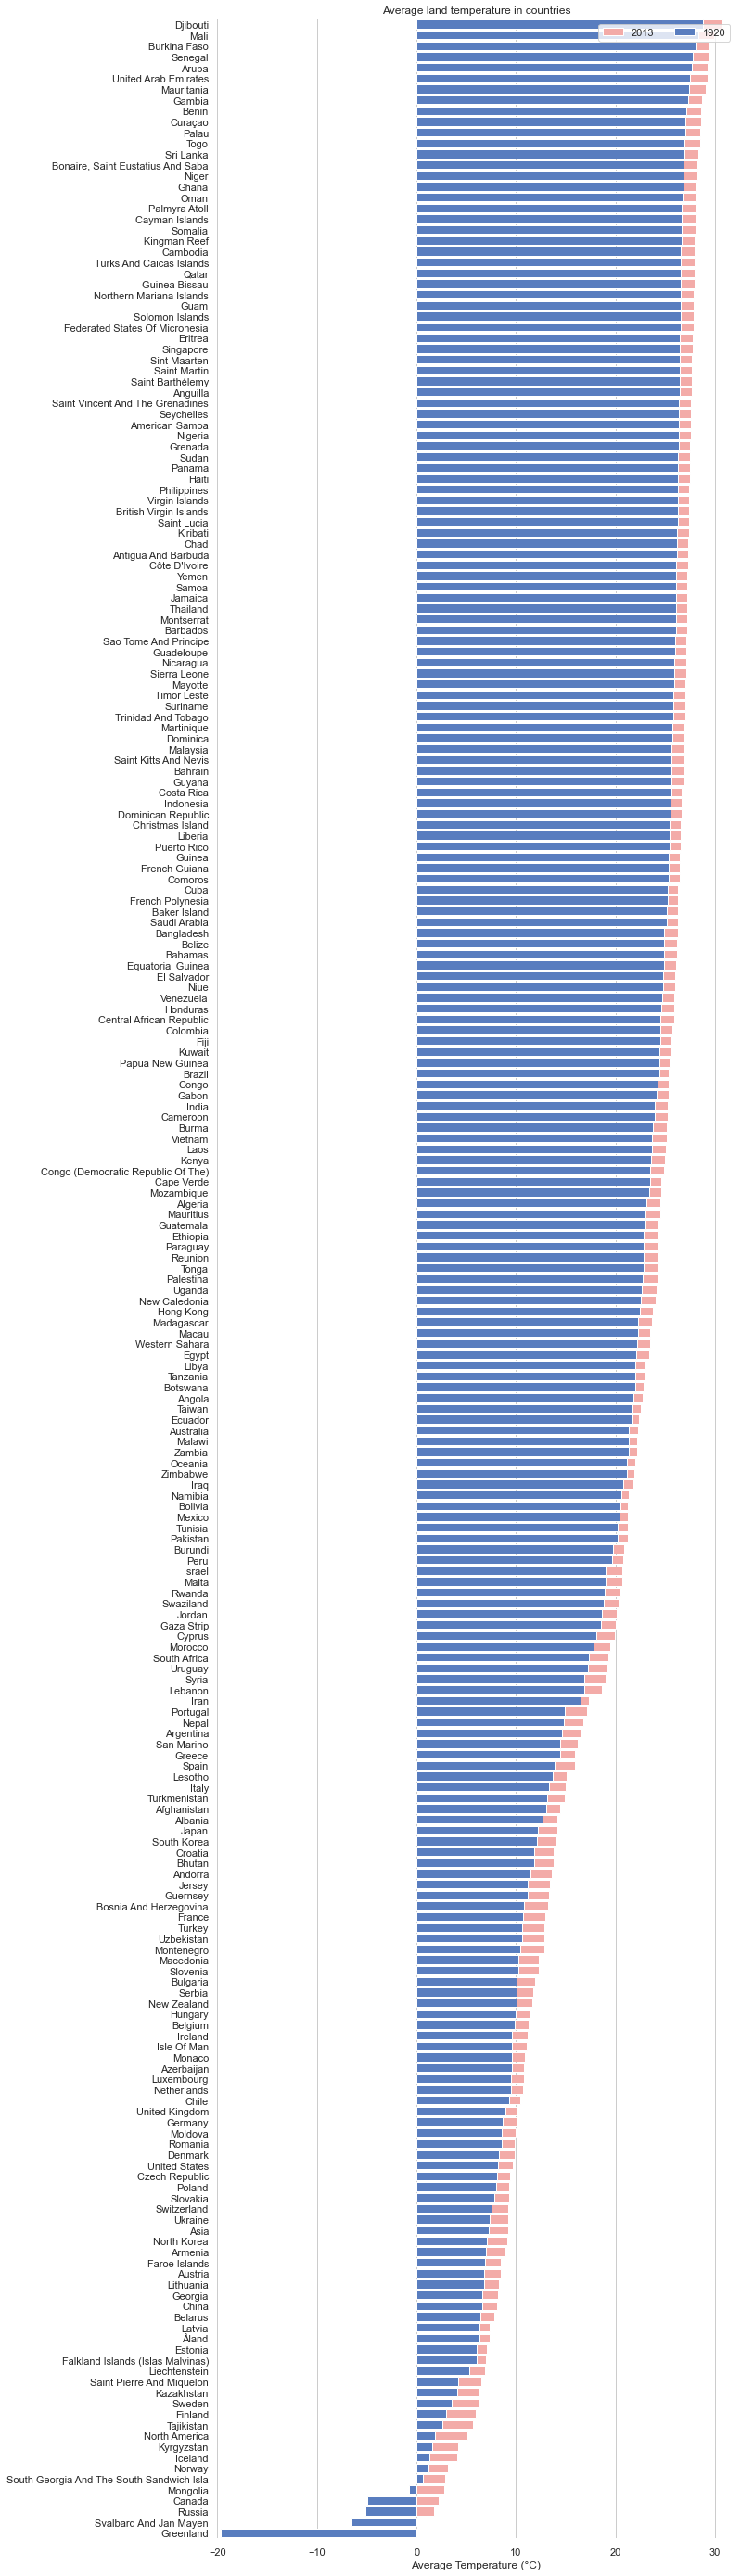

In [20]:
sns.set(style="whitegrid", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 50))


#2013
sns.set_color_codes("pastel")
sns.barplot(x=temperature_2013, y=countries_2013,
            label="2013", color="r")
#1920
sns.set_color_codes("muted")
sns.barplot(x=temperature_1920, y=countries_1920,
            label="1920", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(-20, 32), ylabel="",
       xlabel="Average Temperature (°C)",
       title='Average land temperature in countries')
sns.despine(left=True, bottom=True)

Здесь вы можете увидеть, как изменилась температура с 1920 по 2013 год.

Температура повысилась минимум на 3 градуса. Канада и Россия действительно показали некоторые тревожные данные, 
когда в 1920 году они оба были отрицательными, но затем были положительными в 2013 году.

Это означает, что больше всего пострадали самые холодные места, что может быть опасным признаком, так как ледник растает при температуре выше 0 градусов по Цельсию. 
Это приведет к огромной скорости таяния ледников, если температура будет продолжать расти.

<img src="Pictures/Разделитель.png">

# Обработка данных - проверка на стационарность

<img src="Pictures/Разделитель.png">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

global_temp = pd.read_csv('GlobalTemperatures.csv')

*Библиотеки в каждом блоке загружала отдельно, т.к. блоки содержат разную аналитику(чтобы не загружать завершенный блок заново)*
Избавляюсь от пропущенных значений

In [3]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace = True)
global_temp.dropna(how = 'any', inplace = True)
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [4]:
global_temp['LandAverageTemperature'].tail()

dt
2015-08-01    14.755
2015-09-01    12.999
2015-10-01    10.801
2015-11-01     7.433
2015-12-01     5.518
Name: LandAverageTemperature, dtype: float64

Для начала проверим, является ли этот временной ряд стационарным:
    
    Гипотеза по критерию Дики-Фуллера 
    H0 = нестационарный
    Если не удалось отклонить, он предполагает, что временной ряд имеет единичный корень, то есть он нестационарный. Он имеет некоторую временную структуру.
    Н1 = стационарный
    Нулевая гипотеза отвергается; он предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Он не имеет временной структуры

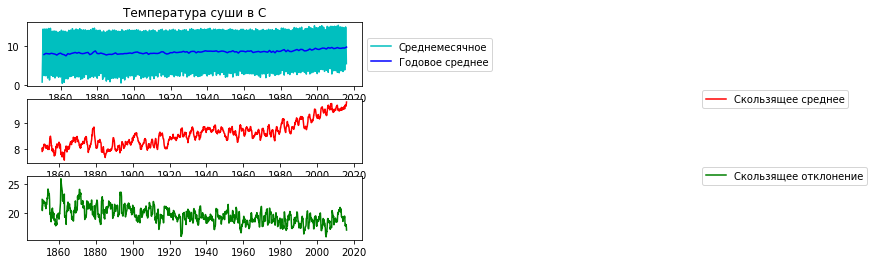

Результаты теста Дики-Фуллера по Среднемесячному:
Test Statistic                            -1.455328
p-value                                    0.555483
#Lags Used                                26.000000
Количество использованных наблюдений    1965.000000
Критическое значение (1%)                 -3.433682
Критическое значение (5%)                 -2.863012
Критическое значение (10%)                -2.567554
dtype: float64


In [5]:
fig = plt.figure()

plt.subplot(311)
plt.title('Температура суши в С')
plt.plot(global_temp['LandAverageTemperature'], color = 'c', label = 'Среднемесячное')
plt.plot(global_temp['LandAverageTemperature'].resample('A').mean(), color = 'b', label = 'Годовое среднее')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



# Добавление скользящего среднего
rolmean = global_temp['LandAverageTemperature'].rolling(12).mean()
rolvar = global_temp['LandAverageTemperature'].rolling(12).var()

plt.subplot(312)
plt.plot(rolmean, label = 'Скользящее среднее', color = 'r')
plt.legend(loc='center left', bbox_to_anchor=(2, 1))

plt.subplot(313)
plt.plot(rolvar, label = 'Скользящее отклонение', color = 'g')
plt.legend(loc='center left', bbox_to_anchor=(2, 1))
plt.show()

# Дополненный тест Дики-Фуллера на стационарность.
def stationarity_test(s, name = None):
    if name != None:
        print('Результаты теста Дики-Фуллера по %s:'%name)
    else:
        print('Результаты теста Дики-Фуллера:')
    
    df_test = sm.tsa.stattools.adfuller(s)
    df_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Количество использованных наблюдений'])
    for key,value in df_test[4].items():
        df_result['Критическое значение (%s)'%key] = value
    print(df_result)

stationarity_test(global_temp['LandAverageTemperature'], 'Среднемесячному')

Text(0.5, 0.98, 'Первоначальные данные о температуре')

<Figure size 432x288 with 0 Axes>

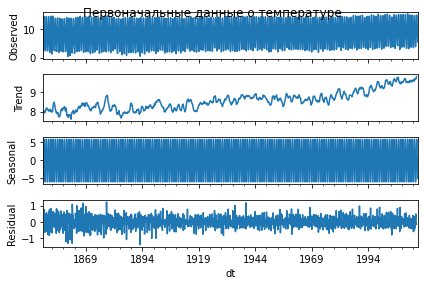

In [6]:
decomposition = sm.tsa.seasonal_decompose(global_temp['LandAverageTemperature'], model='additive')  
fig = plt.figure()  
fig = decomposition.plot()
plt.suptitle('Первоначальные данные о температуре')

Эти данные не являются стационарными.
Так как имеют тенденцию к росту и сильную сезонность
(что логично, т.к. это температура в течение года). 
Поэтому для начала попытаюсь убрать сезонность. 

Как видно ниже, только сезонная разница (12 месяцев) делает статистику 
теста стационарности меньше критических значений 1%.

In [7]:
temp_diff12 = global_temp['LandAverageTemperature'] - global_temp['LandAverageTemperature'].shift(12)
temp_diff12.dropna(inplace = True)
stationarity_test(temp_diff12, 'Температуре - разницей в 12 месяцев')

Результаты теста Дики-Фуллера по Температуре - разницей в 12 месяцев:
Test Statistic                         -1.278337e+01
p-value                                 7.334162e-24
#Lags Used                              2.400000e+01
Количество использованных наблюдений    1.955000e+03
Критическое значение (1%)              -3.433699e+00
Критическое значение (5%)              -2.863020e+00
Критическое значение (10%)             -2.567558e+00
dtype: float64


**Мы интерпретируем этот результат, используя значение p из теста. 
Значение p ниже порогового значения (например, 5% или 1%) предполагает, 
что мы отвергаем нулевую гипотезу (стационарную), в противном случае значение 
p выше порогового значения указывает на то, что мы не можем отклонить нулевую гипотезу (нестационарную).**

р-значение & gt; 0,05: Не удается отклонить нулевую гипотезу (H0), данные имеют единичный корень и являются нестационарными.

р-значение & lt; = 0,05Отклонить нулевую гипотезу (H0), данные не имеют единичного корня и являются стационарными.

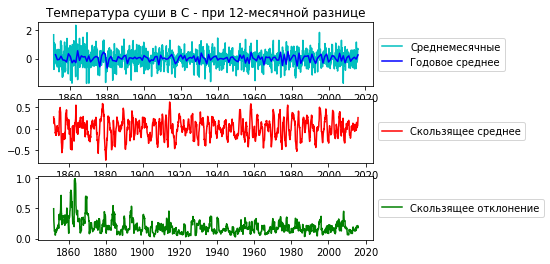

In [8]:
fig = plt.figure()

plt.subplot(311)
plt.title('Температура суши в С - при 12-месячной разнице')
plt.plot(temp_diff12, color = 'c', label = 'Среднемесячные')
plt.plot(temp_diff12.resample('A').mean(), color = 'b', label = 'Годовое среднее')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adding rolling mean
rolmean = temp_diff12.rolling(12).mean()
rolvar = temp_diff12.rolling(12).var()

plt.subplot(312)
plt.plot(rolmean, label = 'Скользящее среднее', color = 'r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplot(313)
plt.plot(rolvar, label = 'Скользящее отклонение', color = 'g')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Теперь видно, что полученный ряд стационарен, а значит, можно приступать к построению модели и прогнозированию

<img src="Pictures/Разделитель.png">

# Time serials с помощью алгоритма SARIMA


<img src="Pictures/Разделитель.png">

Начнем с изучения графиков AFC и PACF сезонных дифференцированных данных

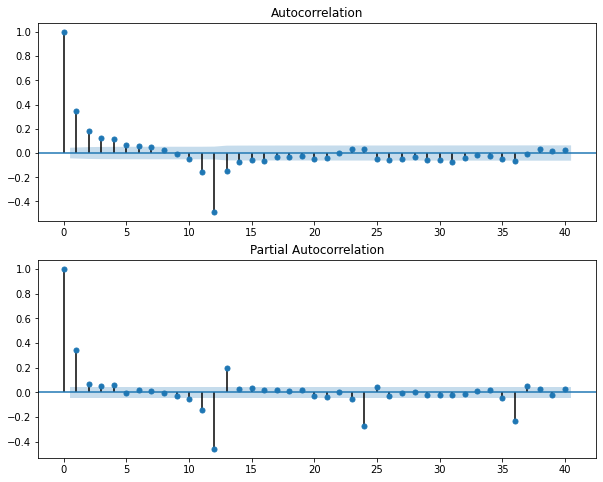

In [9]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp_diff12, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp_diff12, lags=40, ax=ax2)

Ни на графиках ACF, ни на PACF нет пиков, кроме лаг 0, что указывает на то, что эти остатки не коррелированы автоматически.


In [10]:
mod000 = sm.tsa.statespace.SARIMAX(global_temp['LandAverageTemperature'], order=(0,0,0), 
                                    seasonal_order=(0,1,1,12), enforce_stationarity = False, 
                                    enforce_invertibility = False).fit()

 #mod201 = sm.tsa.statespace.SARIMAX(global_temp['LandAverageTemperature'], order=(2,0,1), 
                                   # seasonal_order=(0,1,1,12), enforce_stationarity = False, 
          #                          enforce_invertibility = False).fit()


# mod202 = sm.tsa.statespace.SARIMAX(global_temp['LandAverageTemperature'], order=(2,0,2), 
 #                                   seasonal_order=(0,1,1,12), enforce_stationarity = False, 
  #                                  enforce_invertibility = False).fit()


 #mod205 = sm.tsa.statespace.SARIMAX(global_temp['LandAverageTemperature'], order=(2,0,5), 
  #                                  seasonal_order=(0,1,1,12), enforce_stationarity = False, 
   #                                 enforce_invertibility = False).fit()

 


 #Out:
 #Model AIC BIC HQIC
## ARIMA(0,0,0)x(0,1,1)_12 1718.88434628 1730.07813515 1722.99530443
## ARIMA(2,0,1)x(0,1,1)_12 1258.33364589 1286.31811808 1268.61104126
## ARIMA(2,0,2)x(0,1,1)_12 1249.70453329 1283.28589992 1262.03740774
## ARIMA(2,0,5)x(0,1,1)_12 1259.46169646 1309.8337464 1277.96100813

In [11]:
#print('Model', 'AIC', 'BIC', 'HQIC')
 
#for i in range(4): 
 #   mods = [mod000, mod201, mod202, mod205]
  #  mod_names = ['(0,0,0)', '(2,0,1)', '(2,0,2)', '(2,0,5)']    
   # print('ARIMA' + mod_names[i] + 'x(0,1,1)_12', mods[i].aic, mods[i].bic, mods[i].hqic)

In [12]:
mod202 = sm.tsa.statespace.SARIMAX(global_temp['LandAverageTemperature'], order = (2, 0, 2), 
                                   seasonal_order=(0,1,1,12), enforce_stationarity = False, 
                                   enforce_invertibility = False).fit()
print('Model', 'AIC', 'BIC', 'HQIC')
print('ARIMA(2,0,2)x(0,1,1)_12', mod202.aic, mod202.bic, mod202.hqic)

Model AIC BIC HQIC
ARIMA(2,0,2)x(0,1,1)_12 1249.7045457068436 1283.204030852664 1262.0158442011038


In [13]:
print(mod202.summary())

                                 Statespace Model Results                                 
Dep. Variable:             LandAverageTemperature   No. Observations:                 1992
Model:             SARIMAX(2, 0, 2)x(0, 1, 1, 12)   Log Likelihood                -618.852
Date:                            Thu, 21 May 2020   AIC                           1249.705
Time:                                    15:25:42   BIC                           1283.204
Sample:                                01-01-1850   HQIC                          1262.016
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5564      0.055     28.137      0.000       1.448       1.665
ar.L2         -0.5575      0.055   

Анализ остатков

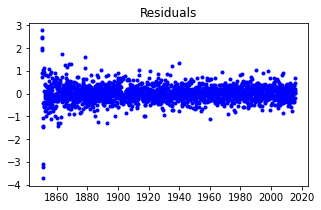

In [14]:
fig = plt.figure(figsize = (5, 3))
resid202 = mod202.resid
plt.plot(resid202, 'b.')
plt.title('Residuals')
plt.show()

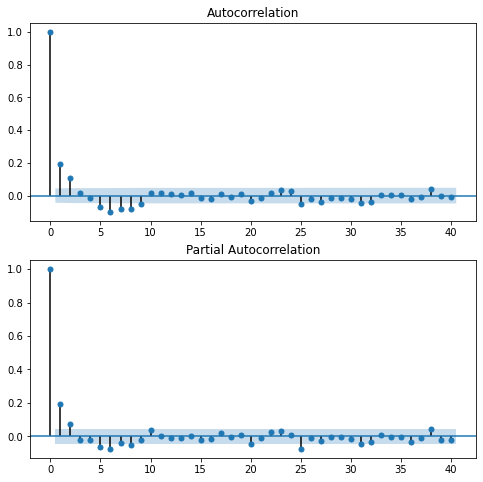

In [15]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid202, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid202, lags=40, ax=ax2)


Ни на графиках ACF, ни на PACF остатков не было обнаружено пиков, кроме лаг 0, что указывает на то, что эти остатки не коррелированы автоматически.

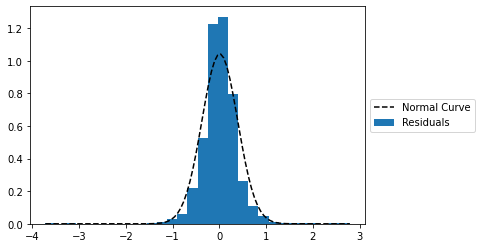

NormaltestResult(statistic=463.77281175913214, pvalue=1.9634213001708833e-101)


In [16]:
def fit_norm(data):
    '''Fits a Normal distribution to 1D data.'''
    mu, std = stats.norm.fit(data)
    x = np.linspace(np.min(data),np.max(data),100)
    y = stats.norm.pdf(x, mu, std)
    return (x, y)


plt.figure()
plt.hist(resid202, bins = 30, density = True, label = 'Residuals')
x, y = fit_norm(resid202)
plt.plot(x, y,'k--', label = 'Normal Curve')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print(stats.normaltest(resid202))

<Figure size 432x288 with 0 Axes>

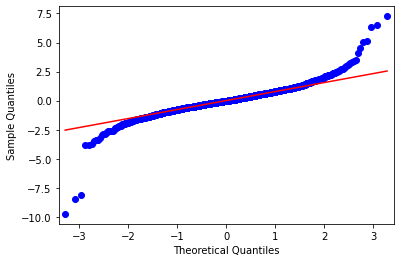

In [17]:
fig = plt.figure()
ax = sm.graphics.qqplot(resid202, line='q', fit=True)

Из нормального теста и графика Q-Q мы можем видеть, что остатки имеют тяжелый хвост.

<img src="Pictures/Разделитель.png">

## Прогнозирование

<img src="Pictures/Разделитель.png">


Я использую эту модель ARIMA (2,0,2) x (0,1,1), чтобы делать прогнозы в выборке и вне выборки.
Дата последней записи в исторических данных 2015-12-01.
После этого мы сделаем пятилетний прогноз только ради обучения.
В действительности, прогноз погоды на пять лет вперед почти гарантированно неосуществим.

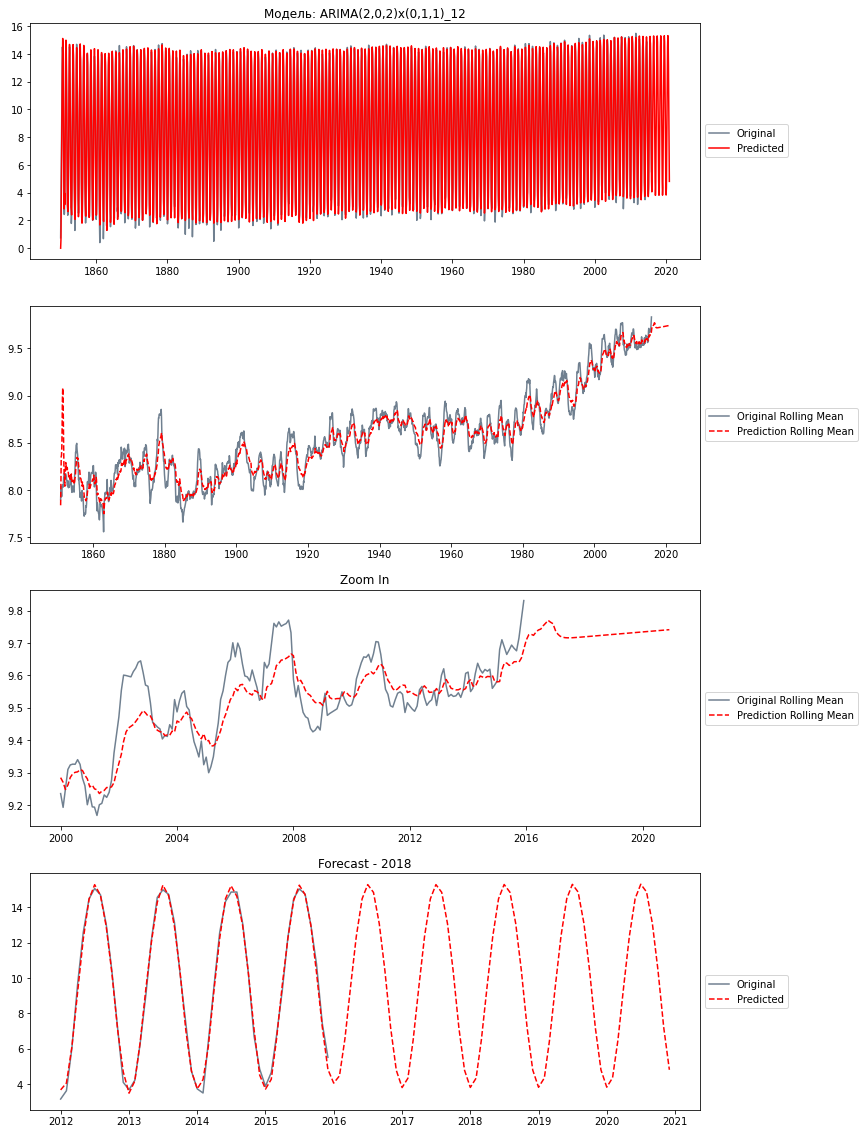

In [21]:
predict_mod202 = mod202.predict('1850-01-01', '2020-12-01')

fig, axs = plt.subplots(4, figsize = (12, 20))
axs[0].set_title('Модель: ARIMA(2,0,2)x(0,1,1)_12')
axs[0].plot(global_temp['LandAverageTemperature'], color = 'slategray', label = 'Original')
axs[0].plot(predict_mod202, color = 'red', label = 'Predicted')
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


predict_rolmean = predict_mod202.rolling(12).mean()
original_rolmean = global_temp['LandAverageTemperature'].rolling(12).mean()

axs[1].plot(original_rolmean, color = 'slategray', label = 'Original Rolling Mean')
axs[1].plot(predict_rolmean, color = 'red', linestyle = '--', label='Prediction Rolling Mean')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

axs[2].set_title('Zoom In')
axs[2].plot(original_rolmean['2000':], color = 'slategray', label = 'Original Rolling Mean')
axs[2].plot(predict_rolmean['2000':], color = 'red', linestyle = '--', label='Prediction Rolling Mean')
axs[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

axs[3].set_title('Forecast - 2018')
axs[3].plot(global_temp['LandAverageTemperature']['2012':'2020'], color = 'slategray', label = 'Original')
axs[3].plot(predict_mod202['2012':'2020'], color='red', linestyle = '--', label = 'Predicted')
axs[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


<img src="Pictures/Разделитель.png">

## Базовое сравнение

<img src="Pictures/Разделитель.png">

Теперь есть рабочая модель, но можно сравнить ее с некоторыми базовыми моделями, чтобы оценить/сравнить ее качество

Климат и погода имеет в себе специфическое прогнозирование. Для прогнозирования погоды, оценки модели 
существуют два основных теста, которые должен пройти любой прогноз погоды, чтобы продемонстрировать его достоинства:

    1. Прогноз должен быть лучше, чем то, что метеорологи называют постоянством: предположение,
    что погода будет такой же завтра (и на следующий день), как сегодня.
    2. Оно также должно превзойти климатологию, долгосрочную историческую среднюю оценку
    условий на конкретную дату в определенной области 

Для проверки этих критериев необходимо построить базовую модель отдельно для каждого пункта

<img src="Pictures/Разделитель.png">

## Модель 1: Постоянство

В этой модели прогнозируется, что температура каждого месяца будет такой же, как и в предыдущем месяце.

In [22]:
predict_dates = pd.date_range(start = '1850-01-01', end ='2020-12-01', freq='MS')
predict_altmod1 = pd.DataFrame(index = predict_dates, columns = ['forecast', 'observed', 'resid'])
predict_altmod1['observed'] = global_temp['LandAverageTemperature']

predict_altmod1['forecast'] = global_temp['LandAverageTemperature'].shift(1)
predict_altmod1.loc['1850-01-01', 'forecast'] = global_temp.loc['1850-01-01', 'LandAverageTemperature']
last_observed = global_temp['LandAverageTemperature'].iloc[-1] 
# all out-of-sample predictions are the same as the last temperature entry in the original data set (observed)
predict_altmod1['forecast'].fillna(last_observed, inplace = True) 

predict_altmod1['resid'] = predict_altmod1['observed'] - predict_altmod1['forecast']

print(predict_altmod1.head(20))
print(predict_altmod1.tail(20))

            forecast  observed  resid
1850-01-01     0.749     0.749  0.000
1850-02-01     0.749     3.071  2.322
1850-03-01     3.071     4.954  1.883
1850-04-01     4.954     7.217  2.263
1850-05-01     7.217    10.004  2.787
1850-06-01    10.004    13.150  3.146
1850-07-01    13.150    14.492  1.342
1850-08-01    14.492    14.039 -0.453
1850-09-01    14.039    11.505 -2.534
1850-10-01    11.505     8.091 -3.414
1850-11-01     8.091     4.733 -3.358
1850-12-01     4.733     2.803 -1.930
1851-01-01     2.803     2.431 -0.372
1851-02-01     2.431     2.508  0.077
1851-03-01     2.508     4.192  1.684
1851-04-01     4.192     7.287  3.095
1851-05-01     7.287    11.113  3.826
1851-06-01    11.113    13.418  2.305
1851-07-01    13.418    14.531  1.113
1851-08-01    14.531    13.751 -0.780
            forecast  observed  resid
2019-05-01     5.518       NaN    NaN
2019-06-01     5.518       NaN    NaN
2019-07-01     5.518       NaN    NaN
2019-08-01     5.518       NaN    NaN
2019-09-01  

<img src="Pictures/Разделитель.png">

## Модель 2: 

В этой модели прогнозируется, что температура каждого месяца является средним значением всех исторических температур того же месяца года.

Например, прогнозируемая температура января 2016 года будет средним значением всех температур января с 1851 по 2015 год; 
прогнозируемая температура февраля 2017 года будет средним значением всех температур февраля 1851–2016 гг. и т. д.

In [24]:
predict_dates = pd.date_range(start = '1850-01-01', end ='2020-12-01', freq='MS')
df = pd.DataFrame(index = predict_dates, columns = ['forecast', 'observed'])
df['observed'] = global_temp['LandAverageTemperature']

df_list = []
for m in range(1, 13):
    newdf = df[df.index.month == m].copy()
    newdf['forecast']  = pd.Series.expanding(newdf['observed']).mean()
    df_list.append(newdf)
predict_altmod2 = pd.concat(df_list)
predict_altmod2.sort_index(inplace = True)

predict_altmod2['resid'] = predict_altmod2['observed'] - predict_altmod2['forecast']


print(predict_altmod2.head(20))
print(predict_altmod2.tail(20))

            forecast  observed   resid
1850-01-01    0.7490     0.749  0.0000
1850-02-01    3.0710     3.071  0.0000
1850-03-01    4.9540     4.954  0.0000
1850-04-01    7.2170     7.217  0.0000
1850-05-01   10.0040    10.004  0.0000
1850-06-01   13.1500    13.150  0.0000
1850-07-01   14.4920    14.492  0.0000
1850-08-01   14.0390    14.039  0.0000
1850-09-01   11.5050    11.505  0.0000
1850-10-01    8.0910     8.091  0.0000
1850-11-01    4.7330     4.733  0.0000
1850-12-01    2.8030     2.803  0.0000
1851-01-01    1.5900     2.431  0.8410
1851-02-01    2.7895     2.508 -0.2815
1851-03-01    4.5730     4.192 -0.3810
1851-04-01    7.2520     7.287  0.0350
1851-05-01   10.5585    11.113  0.5545
1851-06-01   13.2840    13.418  0.1340
1851-07-01   14.5115    14.531  0.0195
1851-08-01   13.8950    13.751 -0.1440
             forecast  observed  resid
2019-05-01  11.241373       NaN    NaN
2019-06-01  13.412976       NaN    NaN
2019-07-01  14.370072       NaN    NaN
2019-08-01  13.837139    

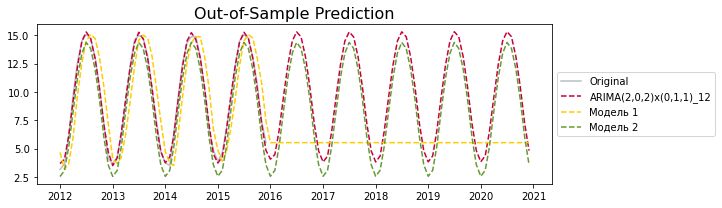

In [26]:
fig = plt.figure(figsize = (10, 3))
mod_names = ['ARIMA(2,0,2)x(0,1,1)_12', 'Модель 1', 'Модель 2']
predicts = [predict_mod202, predict_altmod1['forecast'], predict_altmod2['forecast']]
colors = ['#c70039', '#FFCC00', '#669933']

plt.plot(global_temp['LandAverageTemperature']['2012':'2020'], color = 'slategray', label = 'Original', alpha = 0.5)

for i in range(3):
    plt.plot(predicts[i]['2012':'2020'], color = colors[i], linestyle = '--', label = mod_names[i])

plt.title('Out-of-Sample Prediction', size = 16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()

<img src="Pictures/Разделитель.png">

## Анализ остатков

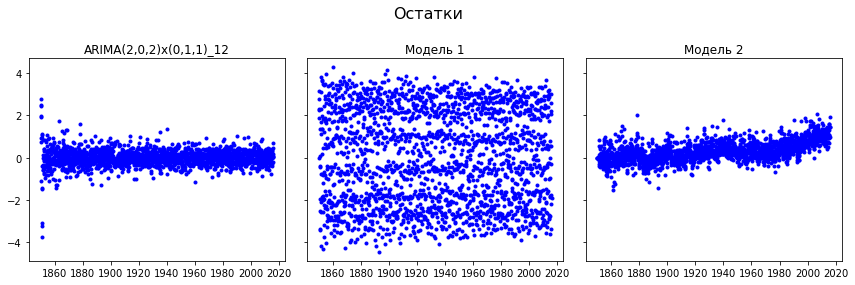

In [31]:
fig, axs = plt.subplots(1, 3, sharey = True, figsize = (12, 4))
resids = [resid202, predict_altmod1['resid'].dropna(), predict_altmod2['resid'].dropna()]

for i in range(3):
    axs[i].set_title(mod_names[i])
    axs[i].plot(resids[i], 'b.')

fig.suptitle('Остатки', size = 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.8)
plt.show()

Из вышеприведенных рисунков видно, что Модель 1 имеет очень рассеянные остатки, 
то есть ошибки большие.

Остатки Модель 2 (чрезмерно упрощенный сезонный), похоже, имеют тенденцию к росту, что нежелательно.

ARIMA(2,0,2)x(0,1,1)_12 NormaltestResult(statistic=463.77281175913214, pvalue=1.9634213001708833e-101)
Модель 1 NormaltestResult(statistic=39154.27910224003, pvalue=0.0)
Модель 2 NormaltestResult(statistic=43.638821605600526, pvalue=3.3415678972003915e-10)


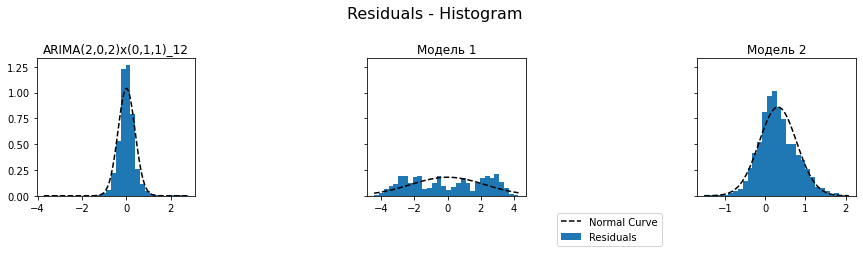

In [33]:
fig, axs = plt.subplots(1, 3, sharey = True, figsize = (12, 4))

for i in range(3):
    plt.sca(axs[i])
    axs[i].set_title(mod_names[i])
    plt.hist(resids[i], bins = 30, density = True, label = 'Residuals')
    
    x, y = fit_norm(resids[i])
    plt.plot(x, y,'k--', label = 'Normal Curve')
    
    print(mod_names[i], stats.normaltest(resids[i]))

fig.suptitle('Residuals - Histogram', size = 16)
plt.legend(loc='lower center', bbox_to_anchor=(-0.55, -0.4))
fig.tight_layout()
fig.subplots_adjust(top = 0.8)
plt.show()


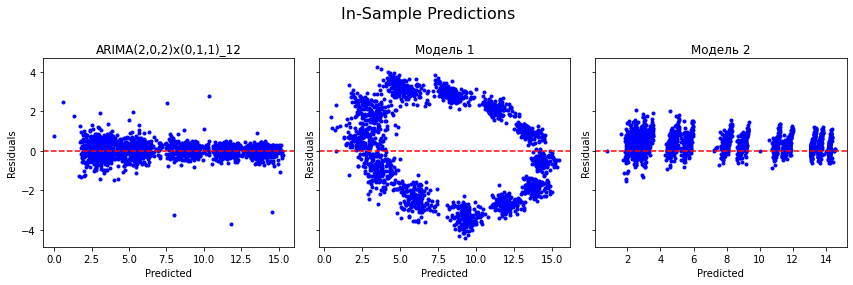

In [34]:
fig, axs = plt.subplots(1, 3, sharey = True, figsize = (12, 4))

for i in range(3):
    plt.sca(axs[i])
    axs[i].set_title(mod_names[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Residuals')
    axs[i].plot(predicts[i][:'2015-12-01'], resids[i], 'b.')
    plt.axhline(y = 0, color='red', linestyle = '--')

fig.suptitle('In-Sample Predictions', size = 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.8)
plt.show()

<img src="Pictures/Разделитель.png">

## Прогноз производительности:

Я буду оценивать прогнозную эффективность этих трех моделей, используя два наиболее часто используемых показателя: 

RMSE (среднеквадратичная ошибка) и MAE (средняя абсолютная ошибка).

In [36]:
print('{:<30s}{:<10s}{:<10s}'.format('Model', 'RMSE', 'MAE'))
print('-' * 50)

for i in range(3):
    print('{:<30s}{:<10.4f}{:<10.4f}'.format(mod_names[i], 
                                    sm.tools.eval_measures.rmse(global_temp['LandAverageTemperature'], 
                                                                predicts[i][:'2015-12-01']),
                                    sm.tools.eval_measures.meanabs(global_temp['LandAverageTemperature'], 
                                                                    predicts[i][:'2015-12-01'])))

Model                         RMSE      MAE       
--------------------------------------------------
ARIMA(2,0,2)x(0,1,1)_12       0.3831    0.2626    
Модель 1                      2.2259    1.9782    
Модель 2                      0.5635    0.4339    


Теперь можно точно утверждать, что что сезонная модель ARIMA выполняет обе базовые модели.

<img src="Pictures/Разделитель.png">